In [2]:
import pandas as pd
kickstarter = pd.read_csv('C:/Users/dakav/Downloads/archive/kickstarter_data_full.csv')

C:\Users\dakav\AppData\Local\Temp\ipykernel_7272\3415186458.py:2: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  kickstarter = pd.read_csv('C:/Users/dakav/Downloads/archive/kickstarter_data_full.csv')


In [2]:
#columns having missing values
null_cols = [col for col in kickstarter.columns if kickstarter[col].isnull().any()]
print(null_cols)

['blurb', 'location', 'category', 'friends', 'is_starred', 'is_backing', 'permissions', 'name_len', 'name_len_clean', 'blurb_len', 'blurb_len_clean']


In [42]:
#MVC = kickstarter.isna().sum()
#print(MVC[0:35])
#print(MVC[35:])

In [13]:
#Handling location missing values
ml = kickstarter[kickstarter['location'].isna()]
print(len(ml))
#print(kickstarter[kickstarter['location'].isna()])
print(kickstarter.loc[239,'country'])
print(kickstarter.loc[239,'location'])
kickstarter['location'] = kickstarter.groupby('country')['location'].transform(lambda x: x.fillna(x.mode()[0]))
ml = kickstarter[kickstarter['location'].isna()]
print(len(ml))
kickstarter.loc[239,'location']

45
US
nan
0


'{"country":"US","urls":{"web":{"discover":"https://www.kickstarter.com/discover/places/new-york-ny","location":"https://www.kickstarter.com/locations/new-york-ny"},"api":{"nearby_projects":"https://api.kickstarter.com/v1/discover?signature=1487275939.b1a505f359634dc0bd1c28204ff26762b0d8d902&woe_id=2459115"}},"name":"New York","displayable_name":"New York, NY","short_name":"New York, NY","id":2459115,"state":"NY","type":"Town","is_root":false,"slug":"new-york-ny"}'

In [4]:
#Handling Category missing values
cml = kickstarter[kickstarter['category'].isna()]
print(len(cml))
mv = kickstarter.loc[121,'category']
print(mv)
#kickstarter['category'] = kickstarter.groupby('source_url')['category'].transform(lambda x: x.fillna(x.mode()[0]))
#dfc = kickstarter.select_dtypes(include=['object'])
kickstarter.loc[121,'category']

1889
nan


nan

In [39]:
kickstarter['friends'] = kickstarter['friends'].fillna(0)
kickstarter['permissions'] = kickstarter['permissions'].fillna(0)
kickstarter['is_starred'] = kickstarter['is_starred'].fillna('FALSE')
kickstarter['is_backing'] = kickstarter['is_backing'].fillna('FALSE')
kickstarter['blurb'] = kickstarter['blurb'].fillna('UnDefined')
kickstarter['name_len'] = kickstarter['name_len'].fillna(0)
kickstarter['name_len_clean'] = kickstarter['name_len_clean'].fillna(0)
kickstarter['blurb_len'] = kickstarter['blurb_len'].fillna(0)
kickstarter['blurb_len_clean'] = kickstarter['blurb_len_clean'].fillna(0)

<AxesSubplot:>

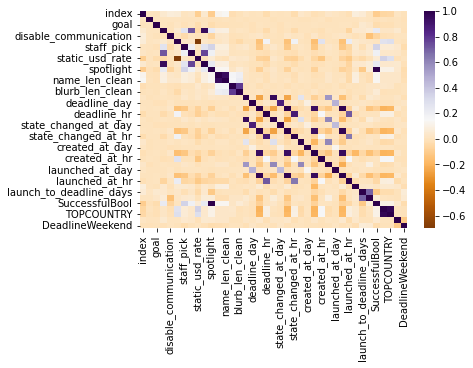

In [46]:
corr_mat = kickstarter.corr()
sns.heatmap(corr_mat, cmap='PuOr')

In [5]:
print(kickstarter.groupby('country')['location'])

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 